<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/Trial_for_Bayesian_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("2023_one hours__normal_on_state.csv", parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

df.head()

,Gt Exhaust Outlet Temp,Turbine Speed In RPM,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),GT (Expander) Efficiency,...,Turb Exhaust T/C 22,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-01-20 17:00:00,611.855,2999.121,13.760,231.782,18.940,87.999,1255.732,14.534,34.919,85.409,...,615.768,608.536,605.209,601.492,610.876,615.695,628.713,611.376,604.494,619.819
2023-01-20 18:00:00,604.004,3002.146,13.175,226.570,18.938,84.113,1244.014,19.430,35.239,85.504,...,607.697,606.971,595.928,589.052,595.202,609.593,616.492,608.235,600.413,600.202
2023-01-20 19:00:00,637.918,3001.744,11.979,207.629,18.780,65.027,1284.943,38.101,35.913,87.532,...,645.148,637.373,643.240,637.800,623.243,636.460,648.020,645.099,648.190,637.079
2023-01-20 20:00:00,636.447,3002.868,12.306,212.659,18.626,67.205,1283.541,33.234,35.783,87.373,...,644.380,632.764,648.446,627.277,618.795,641.789,640.982,649.530,641.044,630.275
2023-01-20 21:00:00,637.513,2998.669,11.290,193.451,17.743,60.577,1270.635,51.623,35.513,86.980,...,641.349,636.851,641.639,638.126,639.001,628.511,633.543,643.794,639.210,642.735


In [8]:
class BayesianLinearRegression:
  def __init__(self, lam):
    self.lam = lam

  def fit(self, X, y):
    # find the posterior p(w | X, y)
    N, D = X.shape

    # let's just naively use MLE to estimate sigma^2
    w_mle = np.linalg.solve(X.T @ X, X.T @ y)
    self.sigma_sq = np.mean((y - X @ w_mle)**2)

    # posterior precision
    self.w_precision = self.lam * np.eye(D) + X.T @ X / self.sigma_sq
    self.w_mean = np.linalg.solve(self.w_precision, X.T @ y / self.sigma_sq)

  def predict(self, X):
    # find the predictive posterior p(y^ | x^, X, y)

    N, D = X.shape
    predicted_mean = X @ self.w_mean

    # let's just make it simple and do a for loop
    # predicted_var = self.sigma_sq * np.ones(N)
    # for i in range(N):
    #   predicted_var[i] += X[i] @ np.linalg.solve(self.precision, X[i])

    # or we can vectorize
    predicted_var = self.sigma_sq + \
      np.sum(X.T * np.linalg.solve(self.w_precision, X.T), axis=0)

    return predicted_mean, predicted_var

In [34]:
df['ones'] = 1

In [10]:
#remaining_columns = list(df.columns).to_numpy()
#remaining_columns.remove("Turb Exhaust T/C 1").to_numpy()

AttributeError: ignored

In [46]:
X = df[['Gt Exhaust Outlet Temp', 'Turbine Speed In RPM', 'GT Fuel Gas Mass Flow',
        'GT Gross MW','GT Compres Inlet Temp','GT IGV Position','GT Turbine Inlet Temperature',
        'GT Swirl Angle','GT Efficiency Actual (LHV)','GT (Expander) Efficiency','Combust Monitor Actual Spread 2','GT Compres Inlet Press',
        'Combust Monitor Actual Spread 1','GT Exhaust Outlet Temp Exp','GT Exhaust Gas Flow - HB','Combust Monitor Actual Spread 3',
        'Turb Exhaust T/C 2','Turb Exhaust T/C 3','Turb Exhaust T/C 4','Turb Exhaust T/C 5',
        'Turb Exhaust T/C 6','Turb Exhaust T/C 7','Turb Exhaust T/C 8','Turb Exhaust T/C 9',
        'Turb Exhaust T/C 10','Turb Exhaust T/C 11','Turb Exhaust T/C 12','Turb Exhaust T/C 13','Turb Exhaust T/C 14',
        'Turb Exhaust T/C 15','Turb Exhaust T/C 16','Turb Exhaust T/C 17','Turb Exhaust T/C 18','Turb Exhaust T/C 19',
        'Turb Exhaust T/C 20','Turb Exhaust T/C 21','Turb Exhaust T/C 22','Turb Exhaust T/C 23','Turb Exhaust T/C 24',
        'Turb Exhaust T/C 25','Turb Exhaust T/C 26','Turb Exhaust T/C 27','Turb Exhaust T/C 28','Turb Exhaust T/C 29',
        'Turb Exhaust T/C 30','Turb Exhaust T/C 31','ones']].to_numpy()
y = df['Turb Exhaust T/C 1'].to_numpy()

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [49]:
X_train.shape, y_train.shape

((1837, 47), (1837,))

In [50]:
bayes_model = BayesianLinearRegression(lam=0.7)
bayes_model.fit(X_train, y_train)

In [51]:
predicted_mean, predicted_var = bayes_model.predict(X_test)

In [52]:
def get_mse(t, y):
  return np.mean((t - y)**2)

In [53]:
get_mse(y_test, predicted_mean)

6.701557001820688

In [54]:
bayes_model.w_mean

array([ 1.88139001,  0.07935701,  1.24385794,  0.57492393,  0.19690544,
       -0.12131239,  0.01623685,  0.54656239, -1.07019159, -0.02402545,
        0.1312299 , -2.41913615,  0.02800698,  0.00319739, -0.0700606 ,
       -0.20686854,  0.22629373, -0.27313153,  0.22110051, -0.17185119,
        0.44397028, -0.48963428,  0.26457726, -0.33456102, -0.30803331,
        0.01049001, -0.18014259, -0.1218548 , -0.04555079, -0.16189442,
       -0.06243443, -0.26268475,  0.02507597,  0.00508771, -0.06763691,
        0.10382833,  0.06628258, -0.28553577, -0.10006452,  0.06020478,
       -0.12876506, -0.18764093,  0.03169903,  0.01938613, -0.01594069,
        0.68479521,  0.03218325])

In [55]:
cov = np.linalg.inv(bayes_model.w_precision)

In [56]:

from scipy.stats import norm

m0 = bayes_model.w_mean[0]
m1 = bayes_model.w_mean[1]
m2 = bayes_model.w_mean[2]
m3 = bayes_model.w_mean[3]
m4 = bayes_model.w_mean[4]
m5 = bayes_model.w_mean[5]
m6 = bayes_model.w_mean[6]
m7 = bayes_model.w_mean[7]
m8 = bayes_model.w_mean[8]
m9 = bayes_model.w_mean[9]
m10 = bayes_model.w_mean[10]
m11 = bayes_model.w_mean[11]
m12 = bayes_model.w_mean[12]
m13 = bayes_model.w_mean[13]
m14 = bayes_model.w_mean[14]
m15 = bayes_model.w_mean[15]
m16 = bayes_model.w_mean[16]
m17 = bayes_model.w_mean[17]
m18 = bayes_model.w_mean[18]
m19 = bayes_model.w_mean[19]
m20 = bayes_model.w_mean[20]
m21 = bayes_model.w_mean[21]
m22 = bayes_model.w_mean[22]
m23 = bayes_model.w_mean[23]
m24 = bayes_model.w_mean[24]
m25 = bayes_model.w_mean[25]
m26 = bayes_model.w_mean[26]
m27 = bayes_model.w_mean[27]
m28 = bayes_model.w_mean[28]
m29 = bayes_model.w_mean[29]
m30 = bayes_model.w_mean[30]
m31 = bayes_model.w_mean[31]
m32 = bayes_model.w_mean[32]
m33 = bayes_model.w_mean[33]
m34 = bayes_model.w_mean[34]
m35 = bayes_model.w_mean[35]
m36 = bayes_model.w_mean[36]
m37 = bayes_model.w_mean[37]
m38 = bayes_model.w_mean[38]
m39 = bayes_model.w_mean[39]
m40 = bayes_model.w_mean[40]
m41 = bayes_model.w_mean[41]
m42 = bayes_model.w_mean[42]
m43 = bayes_model.w_mean[43]
m44 = bayes_model.w_mean[44]
m45 = bayes_model.w_mean[45]
m46 = bayes_model.w_mean[46]


s0 = np.sqrt(cov[0,0])
s1 = np.sqrt(cov[1,1])
s2 = np.sqrt(cov[2,2])
s3 = np.sqrt(cov[3,3])
s4 = np.sqrt(cov[4,4])
s5 = np.sqrt(cov[5,5])
s6 = np.sqrt(cov[6,6])
s7 = np.sqrt(cov[7,7])
s8 = np.sqrt(cov[8,8])
s9 = np.sqrt(cov[9,9])
s10 = np.sqrt(cov[10,10])
s11 = np.sqrt(cov[11,11])
s12 = np.sqrt(cov[12,12])
s13 = np.sqrt(cov[13,13])
s14 = np.sqrt(cov[14,14])
s15 = np.sqrt(cov[15,15])
s16 = np.sqrt(cov[16,16])
s17 = np.sqrt(cov[17,17])
s18 = np.sqrt(cov[18,18])
s19 = np.sqrt(cov[19,19])
s20 = np.sqrt(cov[20,20])
s21 = np.sqrt(cov[21,21])
s22 = np.sqrt(cov[22,22])
s23 = np.sqrt(cov[23,23])
s24 = np.sqrt(cov[24,24])
s25 = np.sqrt(cov[25,25])
s26 = np.sqrt(cov[26,26])
s27 = np.sqrt(cov[27,27])
s28 = np.sqrt(cov[28,28])
s29 = np.sqrt(cov[29,29])
s30 = np.sqrt(cov[30,30])
s31 = np.sqrt(cov[31,31])
s32 = np.sqrt(cov[32,32])
s33 = np.sqrt(cov[33,33])
s34 = np.sqrt(cov[34,34])
s35 = np.sqrt(cov[35,35])
s36 = np.sqrt(cov[36,36])
s37 = np.sqrt(cov[37,37])
s38 = np.sqrt(cov[38,38])
s39 = np.sqrt(cov[39,39])
s40 = np.sqrt(cov[40,40])
s41 = np.sqrt(cov[41,41])
s42 = np.sqrt(cov[42,42])
s43 = np.sqrt(cov[43,43])
s44 = np.sqrt(cov[44,44])
s45 = np.sqrt(cov[45,45])
s46 = np.sqrt(cov[46,46])

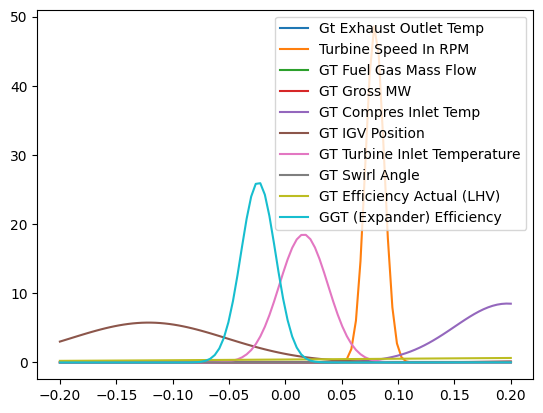

In [61]:
x_vals = np.linspace(-0.2, 0.2, 100)
y_vals = norm.pdf(x_vals, m0, s0)
plt.plot(x_vals, y_vals, label='Gt Exhaust Outlet Temp')

y_vals = norm.pdf(x_vals, m1, s1)
plt.plot(x_vals, y_vals, label='Turbine Speed In RPM')

y_vals = norm.pdf(x_vals, m2, s2)
plt.plot(x_vals, y_vals, label='GT Fuel Gas Mass Flow')

y_vals = norm.pdf(x_vals, m3, s3)
plt.plot(x_vals, y_vals, label='GT Gross MW')

y_vals = norm.pdf(x_vals, m4, s4)
plt.plot(x_vals, y_vals, label='GT Compres Inlet Temp')

y_vals = norm.pdf(x_vals, m5, s5)
plt.plot(x_vals, y_vals, label='GT IGV Position')

y_vals = norm.pdf(x_vals, m6, s6)
plt.plot(x_vals, y_vals, label='GT Turbine Inlet Temperature')

y_vals = norm.pdf(x_vals, m7, s7)
plt.plot(x_vals, y_vals, label='GT Swirl Angle')

y_vals = norm.pdf(x_vals, m7, s8)
plt.plot(x_vals, y_vals, label='GT Efficiency Actual (LHV)')

y_vals = norm.pdf(x_vals, m9, s9)
plt.plot(x_vals, y_vals, label='GGT (Expander) Efficiency')

plt.legend();

Compare with frequentist regression

In [62]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     294.4
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:42:15   Log-Likelihood:                -4283.1
No. Observations:                1837   AIC:                             8660.
Df Residuals:                    1790   BIC:                             8919.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8908      0.190      9.929      0.000       1.517       2.264
x2             0.0059      0.033      0.177      0.860      -0.060       0.071
x3             1.2518      0.197      6.365      0.000       0.866       1.637
x4             0.5971      0.163      3.653      0.000       0.277       0.918
x5             0.1925      0.048      4.043      0.000       0.099       0.286
x6            -0.1438      0.071     -2.033      0.042      -0.282      -0.005
x7             0.0214      0.023      0.931      0.352      -0.024       0.067
x8             0.5608      0.146      3.854      0.000       0.275       0.846
x9            -1.2054      0.513     -2.351      0.019      -2.211      -0.200
x10           -0.0237      0.016     -1.526      0.127      -0.054       0.007
x11            0.1310      0.039      3.384      0.001       0.055       0.207
x12           -2.5681      0.202    -12.723      0.000      -2.964      -2.172
x13            0.0323      0.046      0.703      0.482      -0.058       0.122
x14            0.0039      0.022      0.174      0.862      -0.040       0.047
x15           -0.0718      0.020     -3.614      0.000      -0.111      -0.033
x16           -0.2075      0.034     -6.016      0.000      -0.275      -0.140
x17            0.2277      0.034      6.755      0.000       0.162       0.294
x18           -0.2741      0.050     -5.498      0.000      -0.372      -0.176
x19            0.2222      0.052      4.243      0.000       0.119       0.325
x20           -0.1783      0.039     -4.542      0.000      -0.255      -0.101
x21            0.4472      0.044     10.225      0.000       0.361       0.533
x22           -0.4938      0.052     -9.425      0.000      -0.597      -0.391
x23            0.2628      0.039      6.742      0.000       0.186       0.339
x24           -0.3364      0.034     -9.919      0.000      -0.403      -0.270
x25           -0.3129      0.043     -7.336      0.000      -0.397      -0.229
x26            0.0164      0.041      0.398      0.691      -0.064       0.097
x27           -0.1772      0.039     -4.536      0.000      -0.254      -0.101
x28           -0.1247      0.036     -3.462      0.001      -0.195      -0.054
x29           -0.0504      0.048     -1.038      0.299      -0.145       0.045
x30           -0.1568      0.051     -3.073      0.002      -0.257      -0.057
x31           -0.0711      0.049     -1.451      0.147      -0.167       0.025
x32           -0.2623      0.052     -5.060      0.000      -0.364      -0.161
x33            0.0295      0.052      0.571      0.568      -0.072       0.131
x34            0.0075      0.064      0.118      0.906      -0.117       0.132
x35           -0.0661      0.061     -1.090      0.276      -0.185       0.053
x36            0.1062      0.058      1.837      0.066      -0.007       0.220
x3

In [63]:
predictions = res.get_prediction(X_test)

In [64]:
predictions

In [65]:
get_mse(y_test, predictions.predicted_mean)

6.7692717669818325

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
p_test = model.predict(X_test)
get_mse(y_test, p_test)

6.7692717669842315